In [15]:
import queue
import numpy as np
from typing import List, Tuple
import math
import datetime
import pandas as pd
import itertools
from random_gen import RandomNumberGenerator2
import time
from multiprocessing import Pool, cpu_count
import random
import matplotlib.pyplot as plt
import json
import pickle
from tabulate import tabulate
import matplotlib.patches as pat


In [ ]:
with open(RESULTS_PATH, 'rb') as f:
    results_loaded = pickle.load(f)

In [16]:
df = pd.DataFrame({
    'repetition': [0, 1, 2],
    'kry_3': [0.8, 0.5, 0.9],
    'kry_4': [0.6, 0.4, 0.8],
    'kry_5': [0.9, 0.6, 0.7],
    'kry_6': [0.7, 0.3, 0.6],
})

criteria_cols = ['kry_3', 'kry_4', 'kry_5', 'kry_6']
data = df[criteria_cols].values

num_solutions = data.shape[0]
num_criteria = data.shape[1]

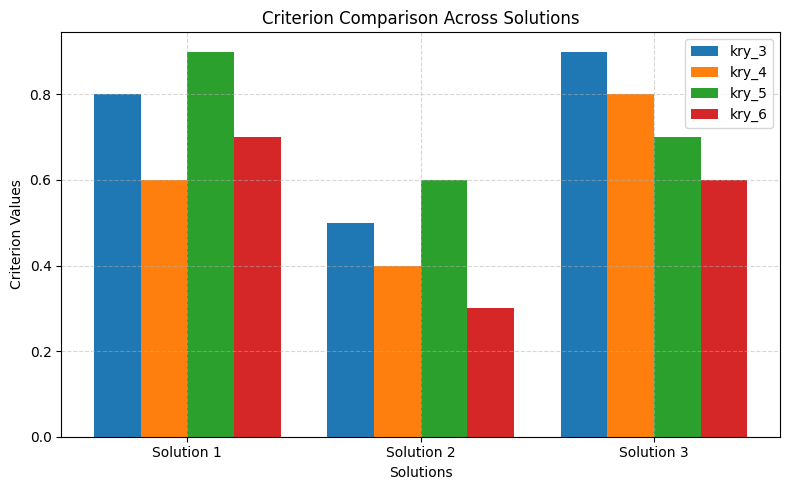

In [17]:
criteria_cols = ['kry_3', 'kry_4', 'kry_5', 'kry_6']
data = df[criteria_cols].values

num_solutions = data.shape[0]
num_criteria = data.shape[1]

x = np.arange(num_solutions)  # [0, 1, 2] for 3 solutions
bar_width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))

# Plot each criterion as a group of bars
for i in range(num_criteria):
    ax.bar(x + i * bar_width, data[:, i], width=bar_width, label=criteria_cols[i])

# Set axis labels and ticks
ax.set_xlabel('Solutions')
ax.set_ylabel('Criterion Values')
ax.set_title('Criterion Comparison Across Solutions')
ax.set_xticks(x + bar_width * (num_criteria - 1) / 2)
ax.set_xticklabels([f'Solution {i+1}' for i in range(num_solutions)])
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

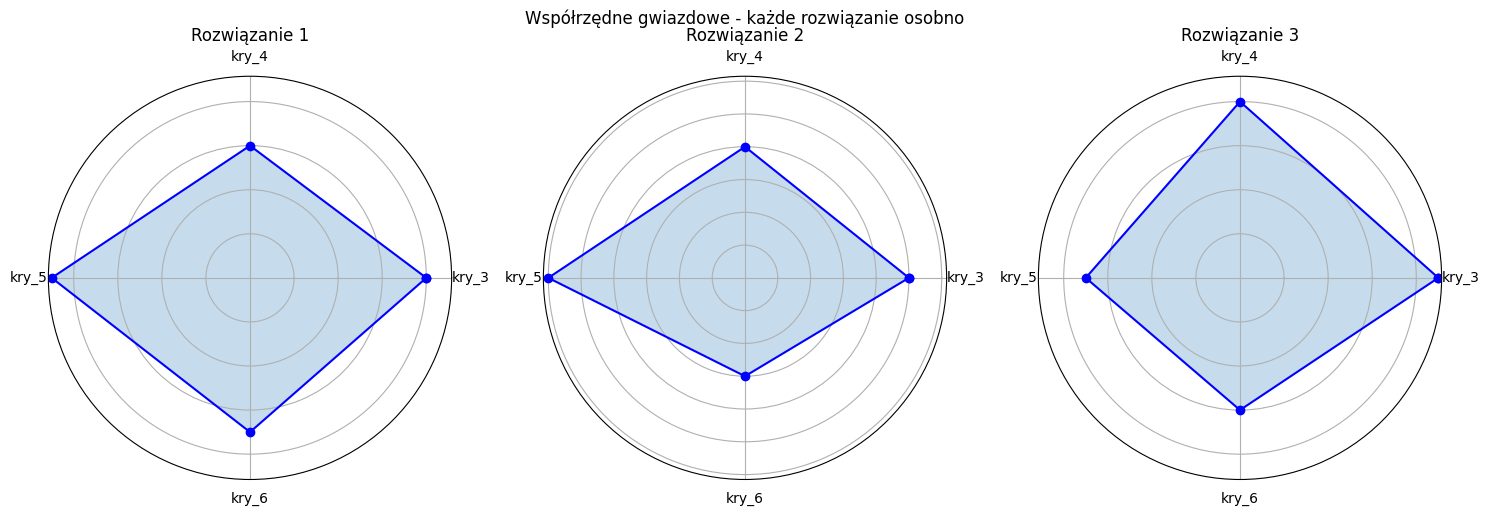

In [18]:
criteria = ['kry_3', 'kry_4', 'kry_5', 'kry_6']
num_criteria = len(criteria)
angles = np.linspace(0, 2 * np.pi, num_criteria, endpoint=False).tolist()
angles += angles[:1]  # zamknięcie wykresu

fig, axs = plt.subplots(1, len(df), figsize=(5*len(df), 5), subplot_kw=dict(polar=True))

for idx, (ax, (_, row)) in enumerate(zip(axs, df.iterrows())):
    values = row[criteria].tolist()
    values += values[:1]
    ax.plot(angles, values, 'b-o')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(criteria)
    ax.set_yticklabels([])
    ax.set_title(f'Rozwiązanie {idx+1}')

plt.suptitle('Współrzędne gwiazdowe - każde rozwiązanie osobno')
plt.tight_layout()
plt.show()

In [19]:
def draw_faces(data):

    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(7)

    number_faces = len(data)
    if number_faces != 4:
        return
    face_area_width = 0.5
    face_width = face_area_width * 0.5
    print()
    midX = [0.25, 0.75, 0.25, 0.75]
    midY = [0.75, 0.75, 0.25, 0.25]
    for i, face in enumerate(data):
        okay = True
        for val in face:
            if val > 1.0 or val < 0.0:
                okay = False
                break

        if okay:
            # face
            shape = pat.Ellipse((midX[i], midY[i]), face_width * (1 + face[0] * 0.9), face_width, angle = 0.0, color='white', ec='black')
            ax.add_patch(shape)

            eye_gap = 0.2
            eye_level = 0.15
            eye_size = 0.1 # * (1.0 - face[1] * 0.75)
            pupil_size = eye_size * 0.35
            brow_size = eye_size * 2.5
            nose_size = 0.3 + 0.1 * face[2]
            nose_width = 0.1 + 0.2 * face[2]
            lips_lift = 10 * math.pow(face[3], 5) - 0.1
            lips_size = 0.3 + 10 * math.pow(face[3], 5)

            c1 = 3.14 * 2 * face_width * lips_size
            c2 = (3.14 * 2 * face_width * 0.3)

            lips_degrees = (70 / (c1 / c2)) * (1.0 - face[3] * 0.75)

            # 0     45
            # 0.33
            # 0.67
            # 1     2

            # left eye
            shape = plt.Circle((midX[i] - face_width * eye_gap, midY[i] + face_width * eye_level), face_width * eye_size, color='white', ec='black')
            ax.add_patch(shape)
            # left pupil
            shape = plt.Circle((midX[i] - face_width * (eye_gap - eye_size * 0.75 * face[1]), midY[i] + face_width * eye_level), face_width * pupil_size, color='black', ec='black')
            ax.add_patch(shape)
            # left brow
            shape = pat.Ellipse((midX[i] - face_width * eye_gap * 0.9, midY[i] + face_width * eye_gap * 1.5), face_width * brow_size, face_width * brow_size * 0.03, angle = 0.0 - face[1] * 45, color='black', ec='black')
            ax.add_patch(shape)

            # right eye
            shape = plt.Circle((midX[i] + face_width * eye_gap, midY[i] + face_width * eye_level), face_width * eye_size, color='white', ec='black')
            ax.add_patch(shape)
            # right pupil
            shape = plt.Circle((midX[i] + face_width * (eye_gap - eye_size * 0.75 * face[1]), midY[i] + face_width * eye_level), face_width * pupil_size, color='black', ec='black')
            ax.add_patch(shape)
            # right brow
            shape = pat.Ellipse((midX[i] + face_width * eye_gap * 0.9, midY[i] + face_width * eye_gap * 1.5), face_width * brow_size, face_width * brow_size * 0.03, angle = 0.0 + face[1] * 45, color='black', ec='black')
            ax.add_patch(shape)

            # nose
            shape = pat.Polygon(
                [
                (midX[i], midY[i] + face_width * 0.2),
                (midX[i] - face_width * nose_width / 2, midY[i] + face_width * (0.2 - nose_size)),
                (midX[i] + face_width * nose_width / 2, midY[i] + face_width * (0.2 - nose_size))
                ], color='white', ec='black', closed=False)
            ax.add_patch(shape)

            # lips
            shape = pat.Arc((midX[i], midY[i] + face_width * lips_lift), face_width * lips_size * 2, face_width * lips_size * 2, angle = 0.0, theta1=-90 - lips_degrees, theta2=-90 + lips_degrees, color='black', ec='black')
            ax.add_patch(shape)

            # face = pat.Ellipse((0.5, 0.5), 1.0, 0.5, angle = 0.0, color='white', ec='black')
            # ax.add_patch(face)
            # rect = pat.Rectangle((0, 0), 1, 1, linewidth=10, edgecolor='black', facecolor='none')
            # ax.add_patch(rect)

            ax.axis('off')
            plt.show()

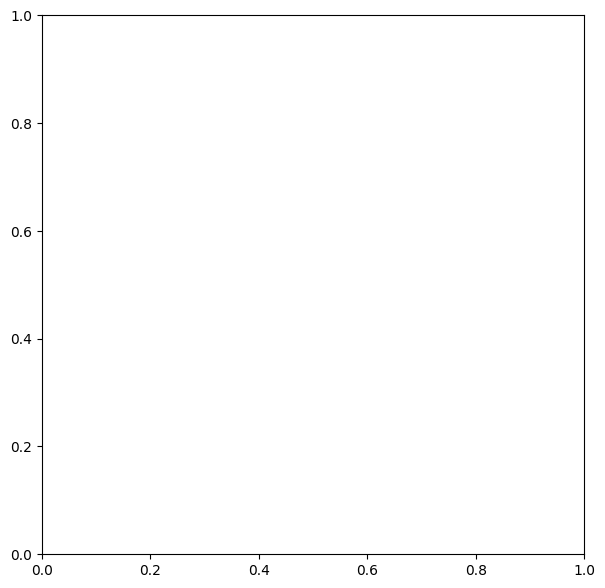

In [20]:
normalized_df = (df - df.min()) / (df.max() - df.min())

# Convert rows into list of lists
data = normalized_df.values.tolist()

# Call your function with the data
draw_faces(data)